In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering 

In [8]:
crime_data = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/6.Clustering/crime_data.csv")
crime_data.head(3)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [9]:
#Normalize data

def norm_func(i):
    r = ( i - i.min()) / ( i.max() - i.min())
    return(r)

n_crimedata = norm_func(crime_data.iloc[:,1:])

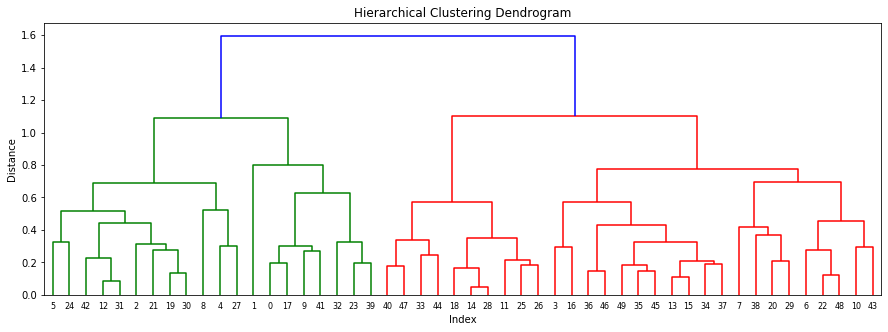

In [10]:
#Create Dendogram

link = linkage(n_crimedata, method="complete", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [11]:
#Apply Hierarchical Clustering
hier_cluster= AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(n_crimedata)
cluster_label= pd.Series(hier_cluster.labels_)

crime_data["Cluster"] = cluster_label
crime_data = crime_data.iloc[:,[5,0,1,2,3,4]]

crime_data.sort_values(by=['Cluster'], inplace=True)
crime_data.head(3)

,Cluster,State,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
17,0,Louisiana,15.4,249,66,22.2
23,0,Mississippi,16.1,259,44,17.1


In [12]:
crime_data.to_csv("Crime_data_Hierarchical.csv",encoding="utf-8")